In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

NameError: name 'all_genres' is not defined

In [ ]:
# Path to the file in Google Drive
file_path = '/content/drive/MyDrive/MOVIE/tmdb-movies.csv'
df = pd.read_csv(file_path)


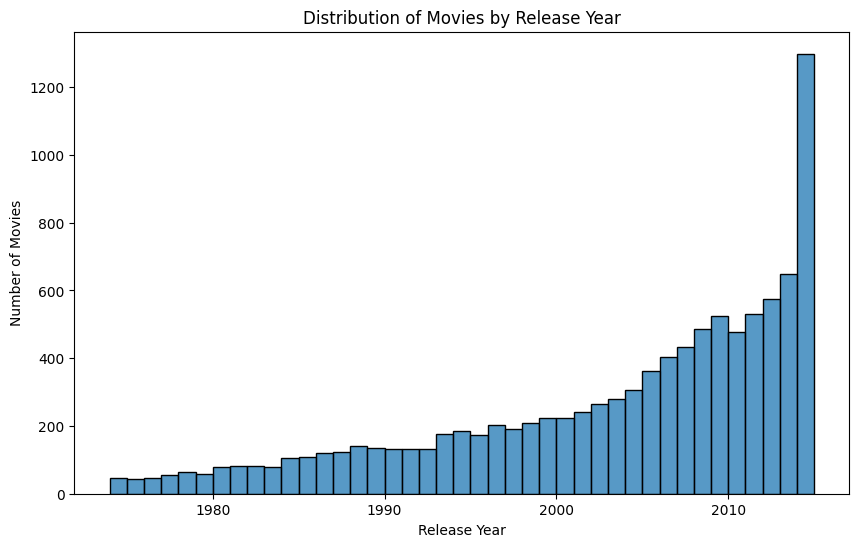

In [ ]:
# 1. Distribution of Movies by Release Year
df['release_year'].describe()
df = df[df['release_year'] <= 2015]
unusual_years = df[df['release_year'] > 2015]
print(unusual_years)
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=range(df['release_year'].min(), df['release_year'].max() + 1), kde=False)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


In [ ]:
# Handle any missing or malformed data
df.dropna(subset=['budget', 'revenue', 'vote_average', 'vote_count', 'genres', 'cast', 'director'], inplace=True)

<ipython-input-15-9260b4fbd09c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y='original_title', data=top_rated_movies, palette='rocket')


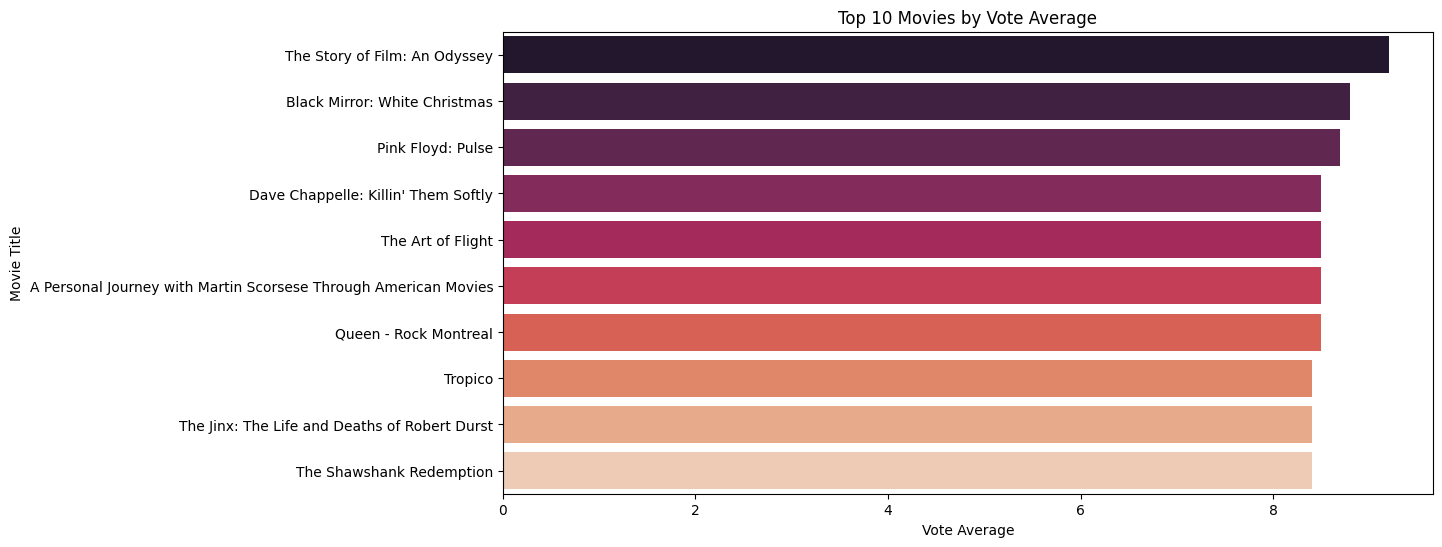

In [ ]:
# 2. Top-Rated Movies Based on Vote Averages
top_rated_movies = df[['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average', y='original_title', data=top_rated_movies, palette='rocket')
plt.title('Top 10 Movies by Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='vote_average', y='original_title', data=top_rated_movies, palette='rocket')
plt.title('Top 10 Movies by Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.show()


In [ ]:
print(top_rated_movies)


                                         original_title  vote_average
3894                      The Story of Film: An Odyssey           9.2
1200                      Black Mirror: White Christmas           8.8
6911                                  Pink Floyd: Pulse           8.7
8221  A Personal Journey with Martin Scorsese Throug...           8.5
3690                                  The Art of Flight           8.5
8411                              Queen - Rock Montreal           8.5
8839                Dave Chappelle: Killin' Them Softly           8.5
4178                           The Shawshank Redemption           8.4
7948                                  Stop Making Sense           8.4
9290                                  Depeche Mode: 101           8.4


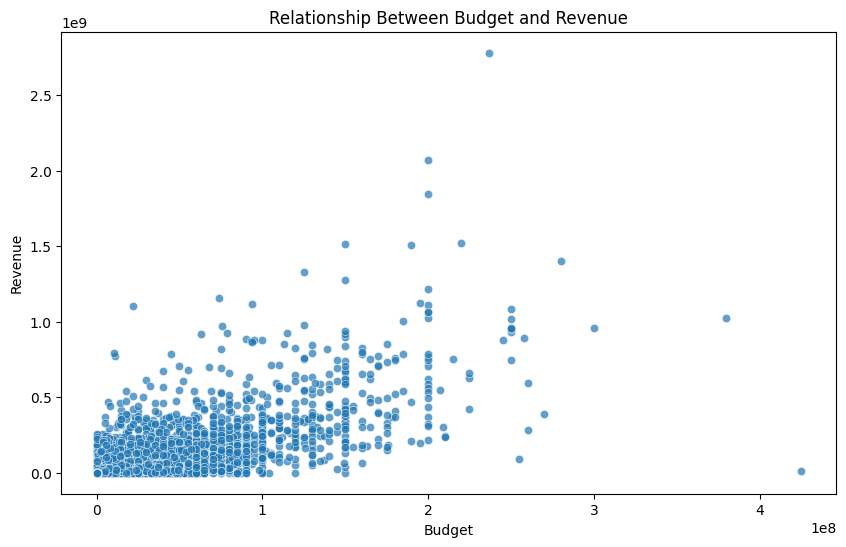

In [ ]:
# 3. Relationship Between Budget and Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, alpha=0.7)
plt.title('Relationship Between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


In [ ]:
# Print the column names of the DataFrame
print(df.columns)


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


<ipython-input-21-ccdac624263b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue', y='genres', data=df_exploded, palette='coolwarm')


Text(0, 0.5, 'Genre')

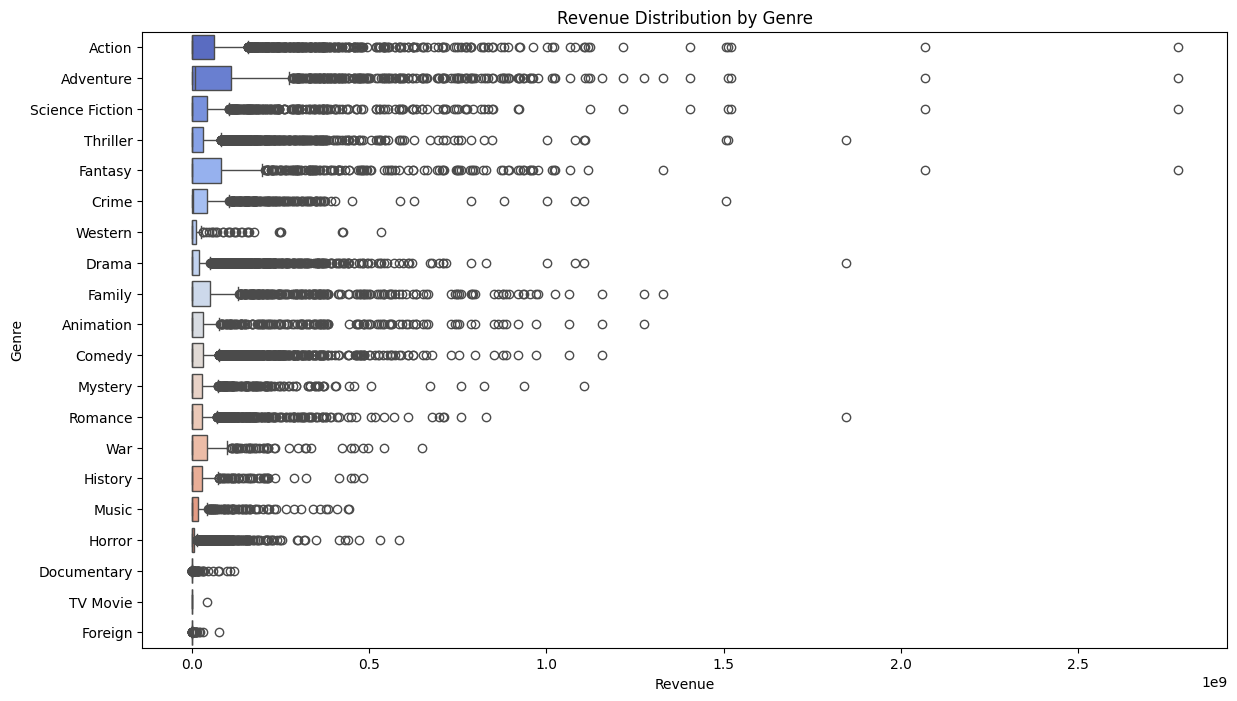

In [ ]:
# 5. Revenue Distribution by Genre
df_exploded = df.explode('genres')

plt.figure(figsize=(14, 8))
sns.boxplot(x='revenue', y='genres', data=df_exploded, palette='coolwarm')
plt.title('Revenue Distribution by Genre')
plt.xlabel('Revenue')
plt.ylabel('Genre')

<ipython-input-32-fc70a0ebe4d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity_metric', y='original_title', data=top_popular_movies, palette='cubehelix')


Text(0, 0.5, 'Movie Title')

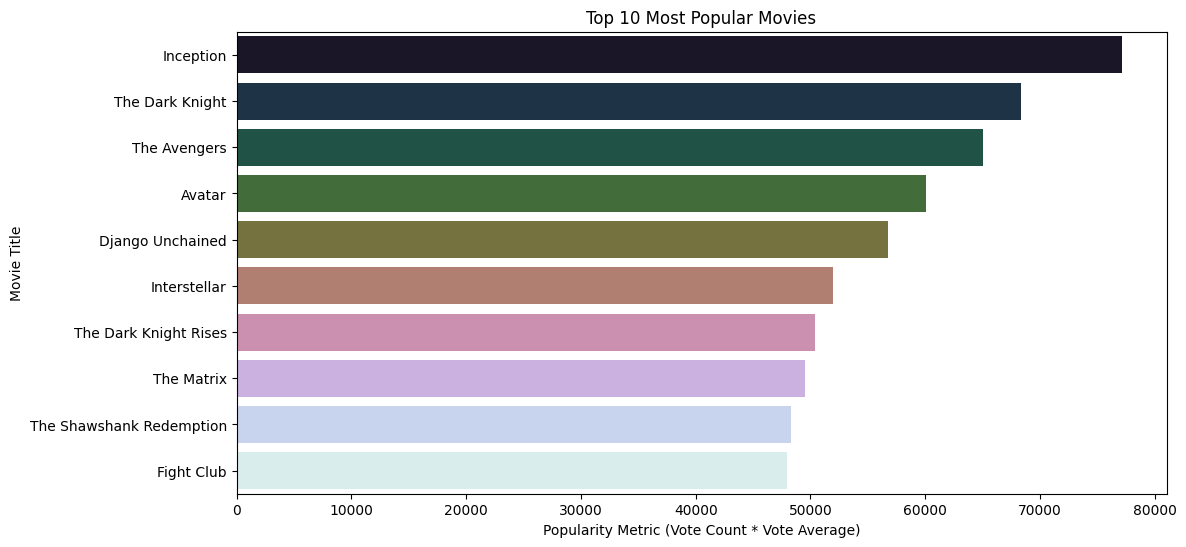

In [ ]:
# 6. Most Popular Movies Based on Vote Counts and Vote Averages
df['popularity_metric'] = df['vote_count'] * df['vote_average']
top_popular_movies = df[['original_title', 'popularity_metric']].sort_values(by='popularity_metric', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='popularity_metric', y='original_title', data=top_popular_movies, palette='cubehelix')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity Metric (Vote Count * Vote Average)')
plt.ylabel('Movie Title')

<ipython-input-29-ec85f944fa1b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors_revenue.values, y=directors_revenue.index, palette='crest')


Text(0, 0.5, 'Director')

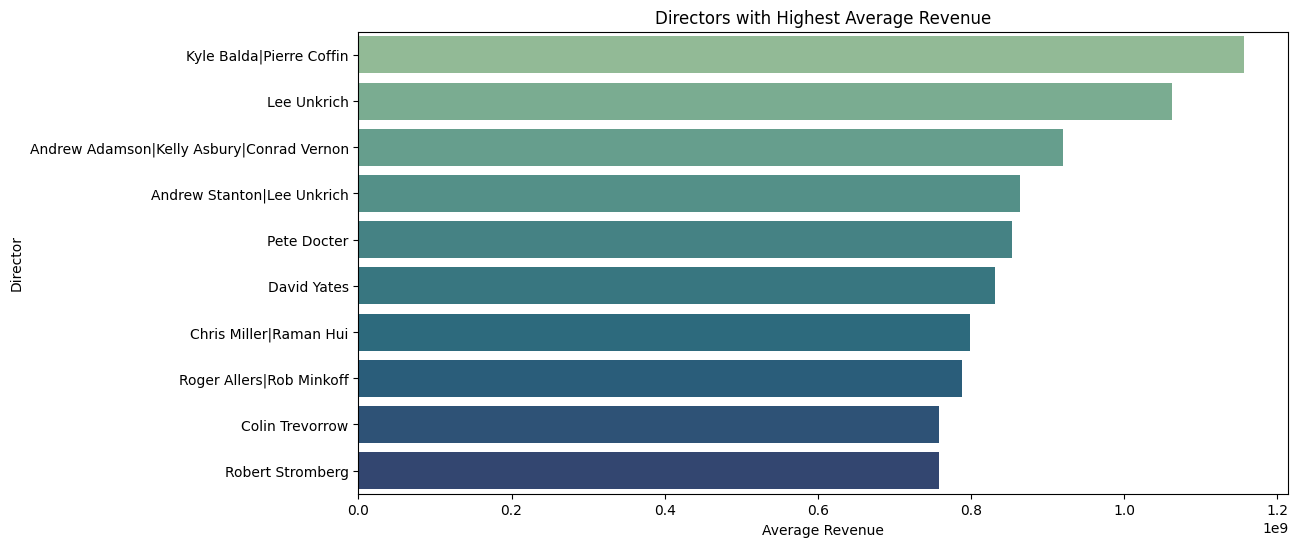

In [ ]:
# 8. Directors with Highest Average Revenue
directors_revenue = df.groupby('director')['revenue'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=directors_revenue.values, y=directors_revenue.index, palette='crest')
plt.title('Directors with Highest Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Director')

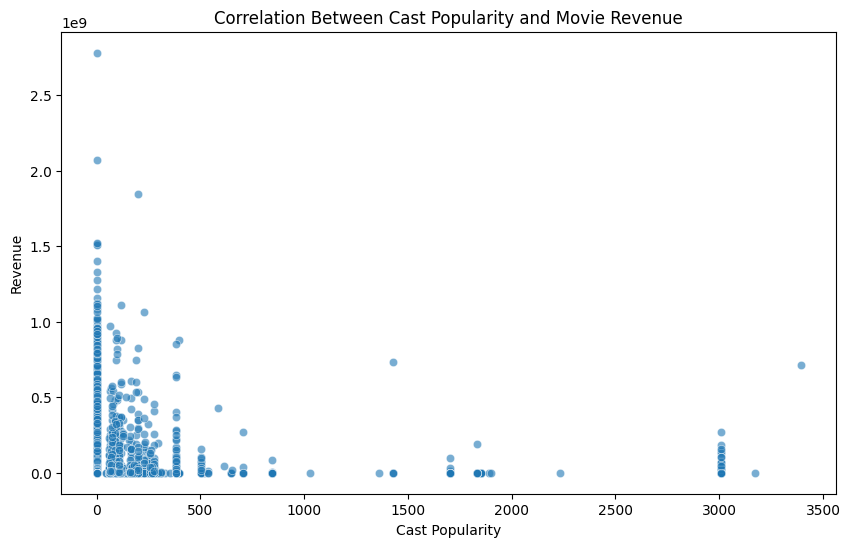

In [ ]:
# Precompute popularity for each actor
actor_popularity = df.explode('cast').groupby('cast')['popularity_metric'].sum()

# Define a function to compute total cast popularity
def compute_cast_popularity(cast_list):
    return sum(actor_popularity.get(actor, 0) for actor in cast_list.split('|'))

# Apply the function to the 'cast' column
df['cast_popularity'] = df['cast'].apply(compute_cast_popularity)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cast_popularity', y='revenue', data=df, alpha=0.6)
plt.title('Correlation Between Cast Popularity and Movie Revenue')
plt.xlabel('Cast Popularity')
plt.ylabel('Revenue')
plt.show()


<ipython-input-27-0e5c01f41711>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=directors_popularity.values, y=directors_popularity.index, palette='coolwarm')


Text(0, 0.5, 'Director')

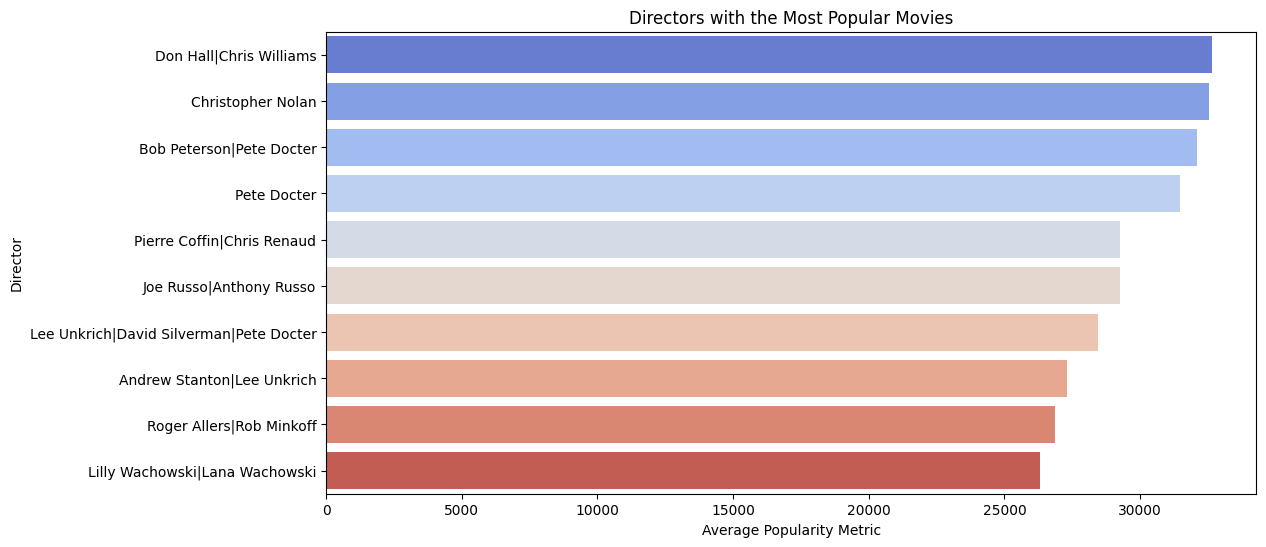

In [ ]:
# 10. Directors with the Most Popular Movies
directors_popularity = df.groupby('director')['popularity_metric'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=directors_popularity.values, y=directors_popularity.index, palette='coolwarm')
plt.title('Directors with the Most Popular Movies')
plt.xlabel('Average Popularity Metric')
plt.ylabel('Director')

In [ ]:
# Convert 'release_date' to datetime format and extract the year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Filter out unrealistic release years (e.g., years after 2023)
current_year = pd.Timestamp.now().year
df = df[(df['release_year'] <= current_year) & (df['release_year'] >= 1960)]  # Assuming movies start from 1900


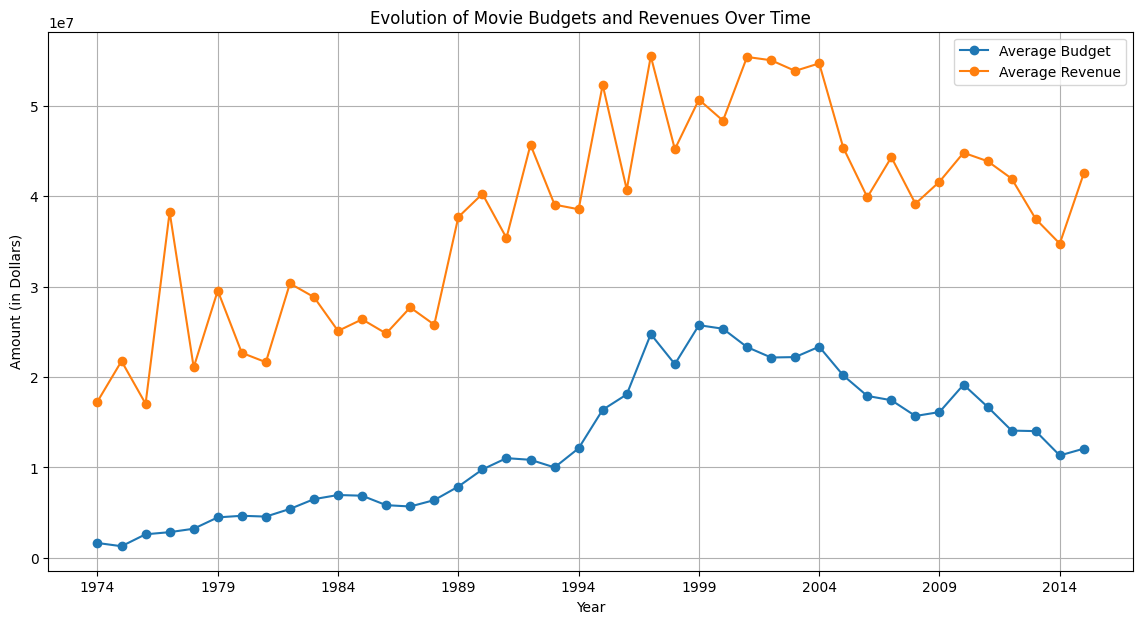

In [ ]:
 #Filter out unrealistic release years (e.g., years after 2023)
current_year = pd.Timestamp.now().year
df = df[(df['release_year'] <= current_year) & (df['release_year'] >= 1960)]  # Assuming movies start from 1900

# 1. Evolution of Movie Budgets and Revenues Over Time
budget_revenue_trend = df.groupby('release_year')[['budget', 'revenue']].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(budget_revenue_trend['release_year'], budget_revenue_trend['budget'], label='Average Budget', marker='o')
plt.plot(budget_revenue_trend['release_year'], budget_revenue_trend['revenue'], label='Average Revenue', marker='o')
plt.title('Evolution of Movie Budgets and Revenues Over Time')
plt.xlabel('Year')
plt.ylabel('Amount (in Dollars)')
plt.legend()
plt.grid(True)

# Customize x-axis to show ticks every 5 years
plt.xticks(ticks=range(int(budget_revenue_trend['release_year'].min()),
                       int(budget_revenue_trend['release_year'].max()) + 1, 5))

plt.show()

<ipython-input-16-2201f36de910>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=release_by_month.index, y=release_by_month.values, palette='coolwarm')


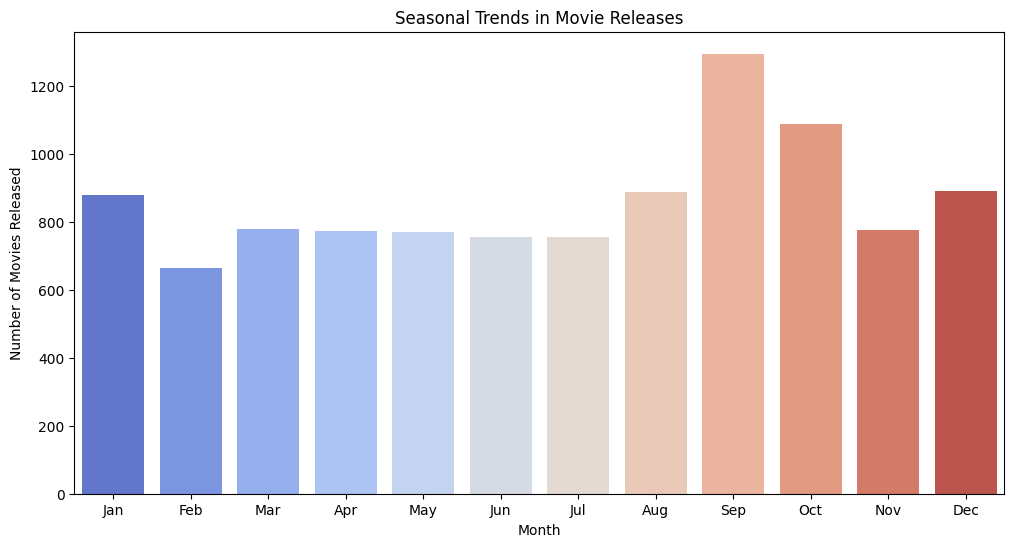

In [ ]:
# 2. Seasonal Trends in Movie Releases
release_by_month = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=release_by_month.index, y=release_by_month.values, palette='coolwarm')
plt.title('Seasonal Trends in Movie Releases')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()